In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [4]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

In [5]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826

In [6]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  Title  
0      0   7.2500        S      1  
1      0  71.2833        C      3  
2      0   7.9250        S      2  
3      0  53.1000        S      3  
4      0   8.0500        S      1

In [7]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [8]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [9]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
dtype: int64

In [10]:
train_df.dropna(subset=['Embarked'], inplace=True)

In [11]:
imputer = KNNImputer(n_neighbors=5)
train_df['Age'] = imputer.fit_transform(train_df[['Age']])
test_df['Age'] = imputer.transform(test_df[['Age']])
train_df['Fare'] = imputer.fit_transform(train_df[['Fare']])
test_df['Fare'] = imputer.transform(test_df[['Fare']])

In [12]:
encoder = OneHotEncoder(drop='first', sparse=False)
for dataset in combine:
    encoded_features = encoder.fit_transform(dataset[['Pclass','Sex', 'Embarked', 'Title']])
    dataset.drop(['Pclass','Sex', 'Embarked', 'Title'], axis=1, inplace=True)
    dataset[encoder.get_feature_names_out(['Pclass','Sex', 'Embarked', 'Title'])] = encoded_features
train_df.head()

C:\Users\iam7w\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\iam7w\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Survived   Age  SibSp  Parch     Fare  Pclass_2  Pclass_3  Sex_male  \
0         0  22.0      1      0   7.2500       0.0       1.0       1.0   
1         1  38.0      1      0  71.2833       0.0       0.0       0.0   
2         1  26.0      0      0   7.9250       0.0       1.0       0.0   
3         1  35.0      1      0  53.1000       0.0       0.0       0.0   
4         0  35.0      0      0   8.0500       0.0       1.0       1.0   

   Embarked_Q  Embarked_S  Title_2  Title_3  Title_4  Title_5  
0         0.0         1.0      0.0      0.0      0.0      0.0  
1         0.0         0.0      0.0      1.0      0.0      0.0  
2         0.0         1.0      1.0      0.0      0.0      0.0  
3         0.0         1.0      0.0      1.0      0.0      0.0  
4         0.0         1.0      0.0      0.0      0.0      0.0

In [13]:
test_df.head()

PassengerId   Age  SibSp  Parch     Fare  Pclass_2  Pclass_3  Sex_male  \
0          892  34.5      0      0   7.8292       0.0       1.0       1.0   
1          893  47.0      1      0   7.0000       0.0       1.0       0.0   
2          894  62.0      0      0   9.6875       1.0       0.0       1.0   
3          895  27.0      0      0   8.6625       0.0       1.0       1.0   
4          896  22.0      1      1  12.2875       0.0       1.0       0.0   

   Embarked_Q  Embarked_S  Title_2  Title_3  Title_4  Title_5  
0         1.0         0.0      0.0      0.0      0.0      0.0  
1         0.0         1.0      0.0      1.0      0.0      0.0  
2         1.0         0.0      0.0      0.0      0.0      0.0  
3         0.0         1.0      0.0      0.0      0.0      0.0  
4         0.0         1.0      0.0      1.0      0.0      0.0

In [14]:
train_df.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Title_2       0
Title_3       0
Title_4       0
Title_5       0
dtype: int64

In [15]:
test_df.isnull().sum()

PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
Pclass_2       0
Pclass_3       0
Sex_male       0
Embarked_Q     0
Embarked_S     0
Title_2        0
Title_3        0
Title_4        0
Title_5        0
dtype: int64

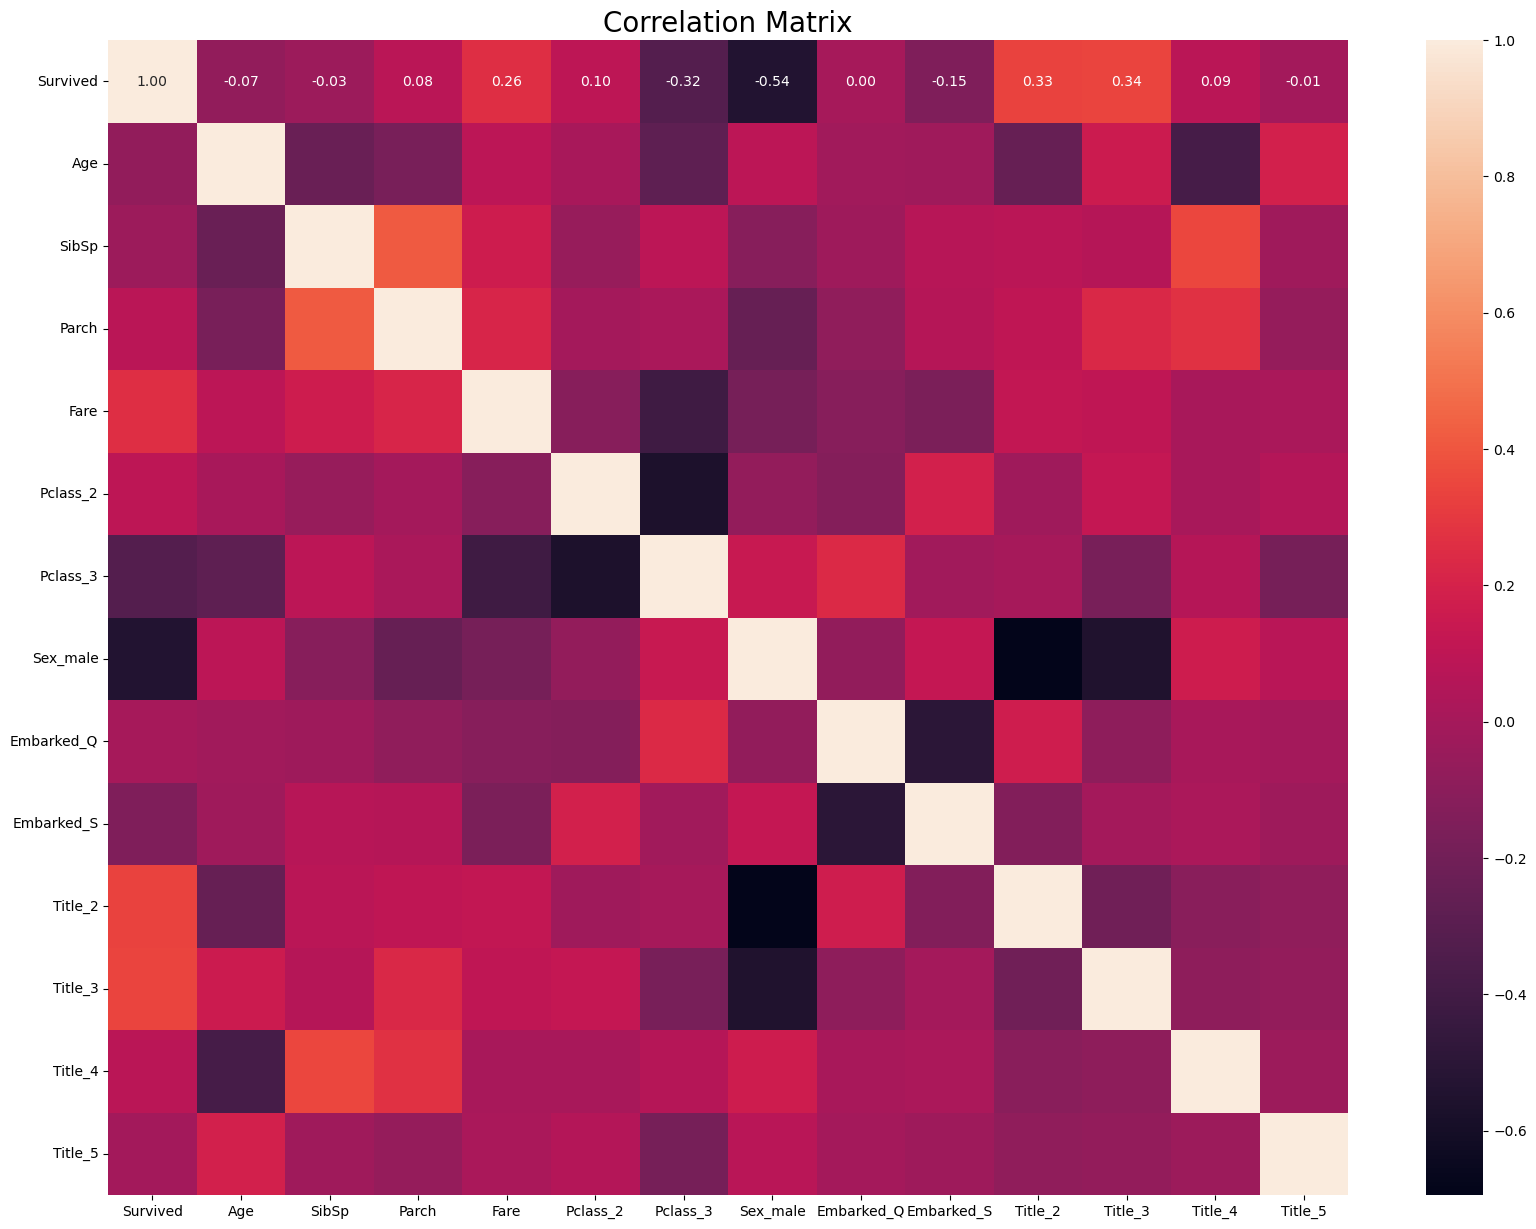

In [16]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(train_df.corr(), annot=True, fmt=".2f", ax=ax)
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [17]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 10)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

C:\Users\iam7w\AppData\Local\Temp\ipykernel_87192\4293896671.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


AgeBand  Survived
0     (0.34, 8.378]  0.666667
1   (8.378, 16.336]  0.413043
2  (16.336, 24.294]  0.355932
3  (24.294, 32.252]  0.338150
4   (32.252, 40.21]  0.435897
5   (40.21, 48.168]  0.342857
6  (48.168, 56.126]  0.466667
7  (56.126, 64.084]  0.347826
8  (64.084, 72.042]  0.000000
9    (72.042, 80.0]  0.500000

In [18]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 8, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 8) & (dataset['Age'] <= 16), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 24), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 32), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 40), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 48), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 56), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 56) & (dataset['Age'] <= 64), 'Age'] = 7
    dataset.loc[(dataset['Age'] > 64) & (dataset['Age'] <= 72), 'Age'] = 8
    dataset.loc[dataset['Age'] > 72, 'Age'] = 9

train_df.head()

Survived  Age  SibSp  Parch     Fare  Pclass_2  Pclass_3  Sex_male  \
0         0  2.0      1      0   7.2500       0.0       1.0       1.0   
1         1  4.0      1      0  71.2833       0.0       0.0       0.0   
2         1  3.0      0      0   7.9250       0.0       1.0       0.0   
3         1  4.0      1      0  53.1000       0.0       0.0       0.0   
4         0  4.0      0      0   8.0500       0.0       1.0       1.0   

   Embarked_Q  Embarked_S  Title_2  Title_3  Title_4  Title_5  \
0         0.0         1.0      0.0      0.0      0.0      0.0   
1         0.0         0.0      0.0      1.0      0.0      0.0   
2         0.0         1.0      1.0      0.0      0.0      0.0   
3         0.0         1.0      0.0      1.0      0.0      0.0   
4         0.0         1.0      0.0      0.0      0.0      0.0   

            AgeBand  
0  (16.336, 24.294]  
1   (32.252, 40.21]  
2  (24.294, 32.252]  
3   (32.252, 40.21]  
4   (32.252, 40.21]

In [19]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

Survived  Age  SibSp  Parch     Fare  Pclass_2  Pclass_3  Sex_male  \
0         0  2.0      1      0   7.2500       0.0       1.0       1.0   
1         1  4.0      1      0  71.2833       0.0       0.0       0.0   
2         1  3.0      0      0   7.9250       0.0       1.0       0.0   
3         1  4.0      1      0  53.1000       0.0       0.0       0.0   
4         0  4.0      0      0   8.0500       0.0       1.0       1.0   

   Embarked_Q  Embarked_S  Title_2  Title_3  Title_4  Title_5  
0         0.0         1.0      0.0      0.0      0.0      0.0  
1         0.0         0.0      0.0      1.0      0.0      0.0  
2         0.0         1.0      1.0      0.0      0.0      0.0  
3         0.0         1.0      0.0      1.0      0.0      0.0  
4         0.0         1.0      0.0      0.0      0.0      0.0

In [20]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.300935
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000

In [21]:
for dataset in combine:
    dataset.loc[ dataset['FamilySize'] <= 1, 'FamilySize'] = 1
    dataset.loc[(dataset['FamilySize'] > 1) & (dataset['FamilySize'] <= 2), 'FamilySize'] = 2
    dataset.loc[(dataset['FamilySize'] > 2) & (dataset['FamilySize'] <= 5), 'FamilySize'] = 3
    dataset.loc[(dataset['FamilySize'] > 5) & (dataset['FamilySize'] <= 7), 'FamilySize'] = 4
    dataset.loc[ dataset['FamilySize'] > 7, 'FamilySize'] = 5
    dataset['FamilySize'] = dataset['FamilySize'].astype(int)

combine = [train_df, test_df]

train_df.head(10)

Survived  Age  SibSp  Parch     Fare  Pclass_2  Pclass_3  Sex_male  \
0         0  2.0      1      0   7.2500       0.0       1.0       1.0   
1         1  4.0      1      0  71.2833       0.0       0.0       0.0   
2         1  3.0      0      0   7.9250       0.0       1.0       0.0   
3         1  4.0      1      0  53.1000       0.0       0.0       0.0   
4         0  4.0      0      0   8.0500       0.0       1.0       1.0   
5         0  3.0      0      0   8.4583       0.0       1.0       1.0   
6         0  6.0      0      0  51.8625       0.0       0.0       1.0   
7         0  0.0      3      1  21.0750       0.0       1.0       1.0   
8         1  3.0      0      2  11.1333       0.0       1.0       0.0   
9         1  1.0      1      0  30.0708       1.0       0.0       0.0   

   Embarked_Q  Embarked_S  Title_2  Title_3  Title_4  Title_5  FamilySize  
0         0.0         1.0      0.0      0.0      0.0      0.0           2  
1         0.0         0.0      0.0      1.0      0.0      0.0           2  
2         0.0         1.0      1.0      0.0      0.0      0.0           1  
3         0.0         1.0      0.0      1.0      0.0      0.0           2  
4         0.0         1.0      0.0      0.0      0.0      0.0           1  
5         1.0         0.0      0.0      0.0      0.0      0.0           1  
6         0.0         1.0      0.0      0.0      0.0      0.0           1  
7         0.0         1.0      0.0      0.0      1.0      0.0           3  
8         0.0         1.0      0.0      1.0      0.0      0.0           3  
9         0.0         0.0      0.0      1.0      0.0      0.0           2

In [22]:
encoder = OneHotEncoder(drop='first', sparse=False)
for dataset in combine:
    encoded_features = encoder.fit_transform(dataset[['FamilySize']])
    dataset.drop(['FamilySize'], axis=1, inplace=True)
    dataset[encoder.get_feature_names_out(['FamilySize'])] = encoded_features
train_df.head()

C:\Users\iam7w\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\iam7w\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Survived  Age  SibSp  Parch     Fare  Pclass_2  Pclass_3  Sex_male  \
0         0  2.0      1      0   7.2500       0.0       1.0       1.0   
1         1  4.0      1      0  71.2833       0.0       0.0       0.0   
2         1  3.0      0      0   7.9250       0.0       1.0       0.0   
3         1  4.0      1      0  53.1000       0.0       0.0       0.0   
4         0  4.0      0      0   8.0500       0.0       1.0       1.0   

   Embarked_Q  Embarked_S  Title_2  Title_3  Title_4  Title_5  FamilySize_2  \
0         0.0         1.0      0.0      0.0      0.0      0.0           1.0   
1         0.0         0.0      0.0      1.0      0.0      0.0           1.0   
2         0.0         1.0      1.0      0.0      0.0      0.0           0.0   
3         0.0         1.0      0.0      1.0      0.0      0.0           1.0   
4         0.0         1.0      0.0      0.0      0.0      0.0           0.0   

   FamilySize_3  FamilySize_4  FamilySize_5  
0           0.0           0.0           0.0  
1           0.0           0.0           0.0  
2           0.0           0.0           0.0  
3           0.0           0.0           0.0  
4           0.0           0.0           0.0

In [23]:
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]

train_df.head()

Survived  Age     Fare  Pclass_2  Pclass_3  Sex_male  Embarked_Q  \
0         0  2.0   7.2500       0.0       1.0       1.0         0.0   
1         1  4.0  71.2833       0.0       0.0       0.0         0.0   
2         1  3.0   7.9250       0.0       1.0       0.0         0.0   
3         1  4.0  53.1000       0.0       0.0       0.0         0.0   
4         0  4.0   8.0500       0.0       1.0       1.0         0.0   

   Embarked_S  Title_2  Title_3  Title_4  Title_5  FamilySize_2  FamilySize_3  \
0         1.0      0.0      0.0      0.0      0.0           1.0           0.0   
1         0.0      0.0      1.0      0.0      0.0           1.0           0.0   
2         1.0      1.0      0.0      0.0      0.0           0.0           0.0   
3         1.0      0.0      1.0      0.0      0.0           1.0           0.0   
4         1.0      0.0      0.0      0.0      0.0           0.0           0.0   

   FamilySize_4  FamilySize_5  
0           0.0           0.0  
1           0.0           0.0  
2           0.0           0.0  
3           0.0           0.0  
4           0.0           0.0

In [24]:
for dataset in combine:
    dataset['Age*Class'] = dataset['Age'] * (1 + dataset['Pclass_2'] + 2 * dataset['Pclass_3'])

train_df.loc[:, ['Age*Class', 'Age', 'Pclass_2', 'Pclass_3']].head(10)

Age*Class  Age  Pclass_2  Pclass_3
0        6.0  2.0       0.0       1.0
1        4.0  4.0       0.0       0.0
2        9.0  3.0       0.0       1.0
3        4.0  4.0       0.0       0.0
4       12.0  4.0       0.0       1.0
5        9.0  3.0       0.0       1.0
6        6.0  6.0       0.0       0.0
7        0.0  0.0       0.0       1.0
8        9.0  3.0       0.0       1.0
9        2.0  1.0       1.0       0.0

In [25]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

C:\Users\iam7w\AppData\Local\Temp\ipykernel_87192\2916669673.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


FareBand  Survived
0  (-0.001, 7.896]  0.197309
1  (7.896, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.577273

In [26]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

Survived  Age  Fare  Pclass_2  Pclass_3  Sex_male  Embarked_Q  Embarked_S  \
0         0  2.0     0       0.0       1.0       1.0         0.0         1.0   
1         1  4.0     3       0.0       0.0       0.0         0.0         0.0   
2         1  3.0     1       0.0       1.0       0.0         0.0         1.0   
3         1  4.0     3       0.0       0.0       0.0         0.0         1.0   
4         0  4.0     1       0.0       1.0       1.0         0.0         1.0   
5         0  3.0     1       0.0       1.0       1.0         1.0         0.0   
6         0  6.0     3       0.0       0.0       1.0         0.0         1.0   
7         0  0.0     2       0.0       1.0       1.0         0.0         1.0   
8         1  3.0     1       0.0       1.0       0.0         0.0         1.0   
9         1  1.0     2       1.0       0.0       0.0         0.0         0.0   

   Title_2  Title_3  Title_4  Title_5  FamilySize_2  FamilySize_3  \
0      0.0      0.0      0.0      0.0           1.0           0.0   
1      0.0      1.0      0.0      0.0           1.0           0.0   
2      1.0      0.0      0.0      0.0           0.0           0.0   
3      0.0      1.0      0.0      0.0           1.0           0.0   
4      0.0      0.0      0.0      0.0           0.0           0.0   
5      0.0      0.0      0.0      0.0           0.0           0.0   
6      0.0      0.0      0.0      0.0           0.0           0.0   
7      0.0      0.0      1.0      0.0           0.0           1.0   
8      0.0      1.0      0.0      0.0           0.0           1.0   
9      0.0      1.0      0.0      0.0           1.0           0.0   

   FamilySize_4  FamilySize_5  Age*Class  
0           0.0           0.0        6.0  
1           0.0           0.0        4.0  
2           0.0           0.0        9.0  
3           0.0           0.0        4.0  
4           0.0           0.0       12.0  
5           0.0           0.0        9.0  
6           0.0           0.0        6.0  
7           0.0           0.0        0.0  
8           0.0           0.0        9.0  
9           0.0           0.0        2.0

In [27]:
test_df.head(10)

PassengerId  Age  Fare  Pclass_2  Pclass_3  Sex_male  Embarked_Q  \
0          892  4.0     0       0.0       1.0       1.0         1.0   
1          893  5.0     0       0.0       1.0       0.0         0.0   
2          894  7.0     1       1.0       0.0       1.0         1.0   
3          895  3.0     1       0.0       1.0       1.0         0.0   
4          896  2.0     1       0.0       1.0       0.0         0.0   
5          897  1.0     1       0.0       1.0       1.0         0.0   
6          898  3.0     0       0.0       1.0       0.0         1.0   
7          899  3.0     2       1.0       0.0       1.0         0.0   
8          900  2.0     0       0.0       1.0       0.0         0.0   
9          901  2.0     2       0.0       1.0       1.0         0.0   

   Embarked_S  Title_2  Title_3  Title_4  Title_5  FamilySize_2  FamilySize_3  \
0         0.0      0.0      0.0      0.0      0.0           0.0           0.0   
1         1.0      0.0      1.0      0.0      0.0           1.0           0.0   
2         0.0      0.0      0.0      0.0      0.0           0.0           0.0   
3         1.0      0.0      0.0      0.0      0.0           0.0           0.0   
4         1.0      0.0      1.0      0.0      0.0           0.0           1.0   
5         1.0      0.0      0.0      0.0      0.0           0.0           0.0   
6         0.0      1.0      0.0      0.0      0.0           0.0           0.0   
7         1.0      0.0      0.0      0.0      0.0           0.0           1.0   
8         0.0      0.0      1.0      0.0      0.0           0.0           0.0   
9         1.0      0.0      0.0      0.0      0.0           0.0           1.0   

   FamilySize_4  FamilySize_5  Age*Class  
0           0.0           0.0       12.0  
1           0.0           0.0       15.0  
2           0.0           0.0       14.0  
3           0.0           0.0        9.0  
4           0.0           0.0        6.0  
5           0.0           0.0        3.0  
6           0.0           0.0        9.0  
7           0.0           0.0        6.0  
8           0.0           0.0        6.0  
9           0.0           0.0        6.0

In [28]:
train_df.corr()

Survived       Age      Fare  Pclass_2  Pclass_3  Sex_male  \
Survived      1.000000 -0.073483  0.293182  0.095002 -0.320171 -0.541585   
Age          -0.073483  1.000000  0.068777  0.019388 -0.282313  0.093192   
Fare          0.293182  0.068777  1.000000  0.039016 -0.541621 -0.245864   
Pclass_2      0.095002  0.019388  0.039016  1.000000 -0.567432 -0.066459   
Pclass_3     -0.320171 -0.282313 -0.541621 -0.567432  1.000000  0.134227   
Sex_male     -0.541585  0.093192 -0.245864 -0.066459  0.134227  1.000000   
Embarked_Q    0.004536 -0.031145 -0.242241 -0.127705  0.237035 -0.075217   
Embarked_S   -0.151777 -0.008897 -0.024998  0.190824 -0.013594  0.121405   
Title_2       0.334953 -0.253324  0.058910 -0.021130  0.002098 -0.694744   
Title_3       0.340870  0.155968  0.258779  0.120833 -0.175953 -0.550071   
Title_4       0.085998 -0.354035  0.155196  0.009658  0.064470  0.159612   
Title_5      -0.011611  0.194491  0.079080  0.056659 -0.181011  0.075300   
FamilySize_2  0.164834  0.069144  0.304065  0.004882 -0.187508 -0.186639   
FamilySize_3  0.169694 -0.160558  0.287579  0.110778 -0.077158 -0.182962   
FamilySize_4 -0.072452 -0.190351  0.194061 -0.087399  0.120563 -0.049985   
FamilySize_5 -0.095868 -0.061799  0.163476 -0.062235  0.109678 -0.008591   
Age*Class    -0.307045  0.637220 -0.430894 -0.054797  0.393880  0.171666   

              Embarked_Q  Embarked_S   Title_2   Title_3   Title_4   Title_5  \
Survived        0.004536   -0.151777  0.334953  0.340870  0.085998 -0.011611   
Age            -0.031145   -0.008897 -0.253324  0.155968 -0.354035  0.194491   
Fare           -0.242241   -0.024998  0.058910  0.258779  0.155196  0.079080   
Pclass_2       -0.127705    0.190824 -0.021130  0.120833  0.009658  0.056659   
Pclass_3        0.237035   -0.013594  0.002098 -0.175953  0.064470 -0.181011   
Sex_male       -0.075217    0.121405 -0.694744 -0.550071  0.159612  0.075300   
Embarked_Q      1.000000   -0.499261  0.168434 -0.090045  0.010330  0.000198   
Embarked_S     -0.499261    1.000000 -0.138519 -0.003992  0.024577 -0.026347   
Title_2         0.168434   -0.138519  1.000000 -0.206644 -0.110890 -0.083257   
Title_3        -0.090045   -0.003992 -0.206644  1.000000 -0.087798 -0.065919   
Title_4         0.010330    0.024577 -0.110890 -0.087798  1.000000 -0.035374   
Title_5         0.000198   -0.026347 -0.083257 -0.065919 -0.035374  1.000000   
FamilySize_2   -0.051352   -0.102177 -0.045586  0.305543 -0.059803 -0.003042   
FamilySize_3   -0.071738    0.015196  0.080801  0.161334  0.211367 -0.014866   
FamilySize_4    0.042854    0.057364  0.042893  0.020573  0.296244 -0.032498   
FamilySize_5   -0.037513    0.075138  0.030285 -0.022318  0.154381 -0.019853   
Age*Class       0.136119    0.067169 -0.239750  0.048229 -0.301143 -0.003652   

              FamilySize_2  FamilySize_3  FamilySize_4  FamilySize_5  \
Survived          0.164834      0.169694     -0.072452     -0.095868   
Age               0.069144     -0.160558     -0.190351     -0.061799   
Fare              0.304065      0.287579      0.194061      0.163476   
Pclass_2          0.004882      0.110778     -0.087399     -0.062235   
Pclass_3         -0.187508     -0.077158      0.120563      0.109678   
Sex_male         -0.186639     -0.182962     -0.049985     -0.008591   
Embarked_Q       -0.051352     -0.071738      0.042854     -0.037513   
Embarked_S       -0.102177      0.015196      0.057364      0.075138   
Title_2          -0.045586      0.080801      0.042893      0.030285   
Title_3           0.305543      0.161334      0.020573     -0.022318   
Title_4          -0.059803      0.211367      0.296244      0.154381   
Title_5          -0.003042     -0.014866     -0.032498     -0.019853   
FamilySize_2      1.000000     -0.208463     -0.093779     -0.057288   
FamilySize_3     -0.208463      1.000000     -0.088397     -0.054001   
FamilySize_4     -0.093779     -0.088397      1.000000     -0.024293   
FamilySize_5     -0.057288     -0.054001     -0.0242

In [29]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((889, 16), (889,), (418, 16))

# Fine Tuning Models

In [30]:
decision_tree = DecisionTreeClassifier()

param_grid = {'max_depth': [2, 3, 4, 5, 6, 7],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
              'criterion': ['gini', 'entropy']
              }

grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Parameters for best score:", grid_search.best_params_)
print("Decision Tree Score:", grid_search.best_score_)

final_dt = grid_search.best_estimator_
y_pred = final_dt.predict(X_test)

Parameters for best score: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
Decision Tree Score: 0.8166825366596839


In [31]:
random_forest = RandomForestClassifier()

param_distributions = {
    'n_estimators': np.arange(100, 1000),
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

final_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_distributions, n_iter=100, cv=5)
final_rf.fit(X_train, y_train)

print("Parameters for best score:", final_rf.best_params_)
print("Random Forest Score:", final_rf.best_score_)

Parameters for best score: {'n_estimators': 497, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 12, 'bootstrap': True}
Random Forest Score: 0.8279311877102774


# Plotting Decision Tree

In [32]:
plt.figure(figsize=(300, 125))
feature_names = list(X_train.columns)
plot_tree(final_dt, feature_names=feature_names, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

# Computing Cross Validation Scores

In [33]:
dt_scores = cross_val_score(final_dt, X_train, y_train, cv=5)

print("Decision Tree: Average Classification Accuracy (Gini):", np.mean(dt_scores))

Decision Tree: Average Classification Accuracy (Gini): 0.8166825366596839


In [ ]:
rf_scores = cross_val_score(final_rf, X_train, y_train, cv=5)

print("Average Classification Accuracy (Random Forest - Gini):", np.mean(rf_scores))